# Problem Statement
Jamboree recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

Our analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.



# Importing libraries


In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Loading Dataset


In [143]:
df = pd.read_csv('Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [144]:
df.shape

(500, 9)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


##### We can remove Serial No. as it is useless

In [146]:
df.drop(columns=['Serial No.'], inplace=True)

In [147]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Performing EDA

### Bivariate analysis

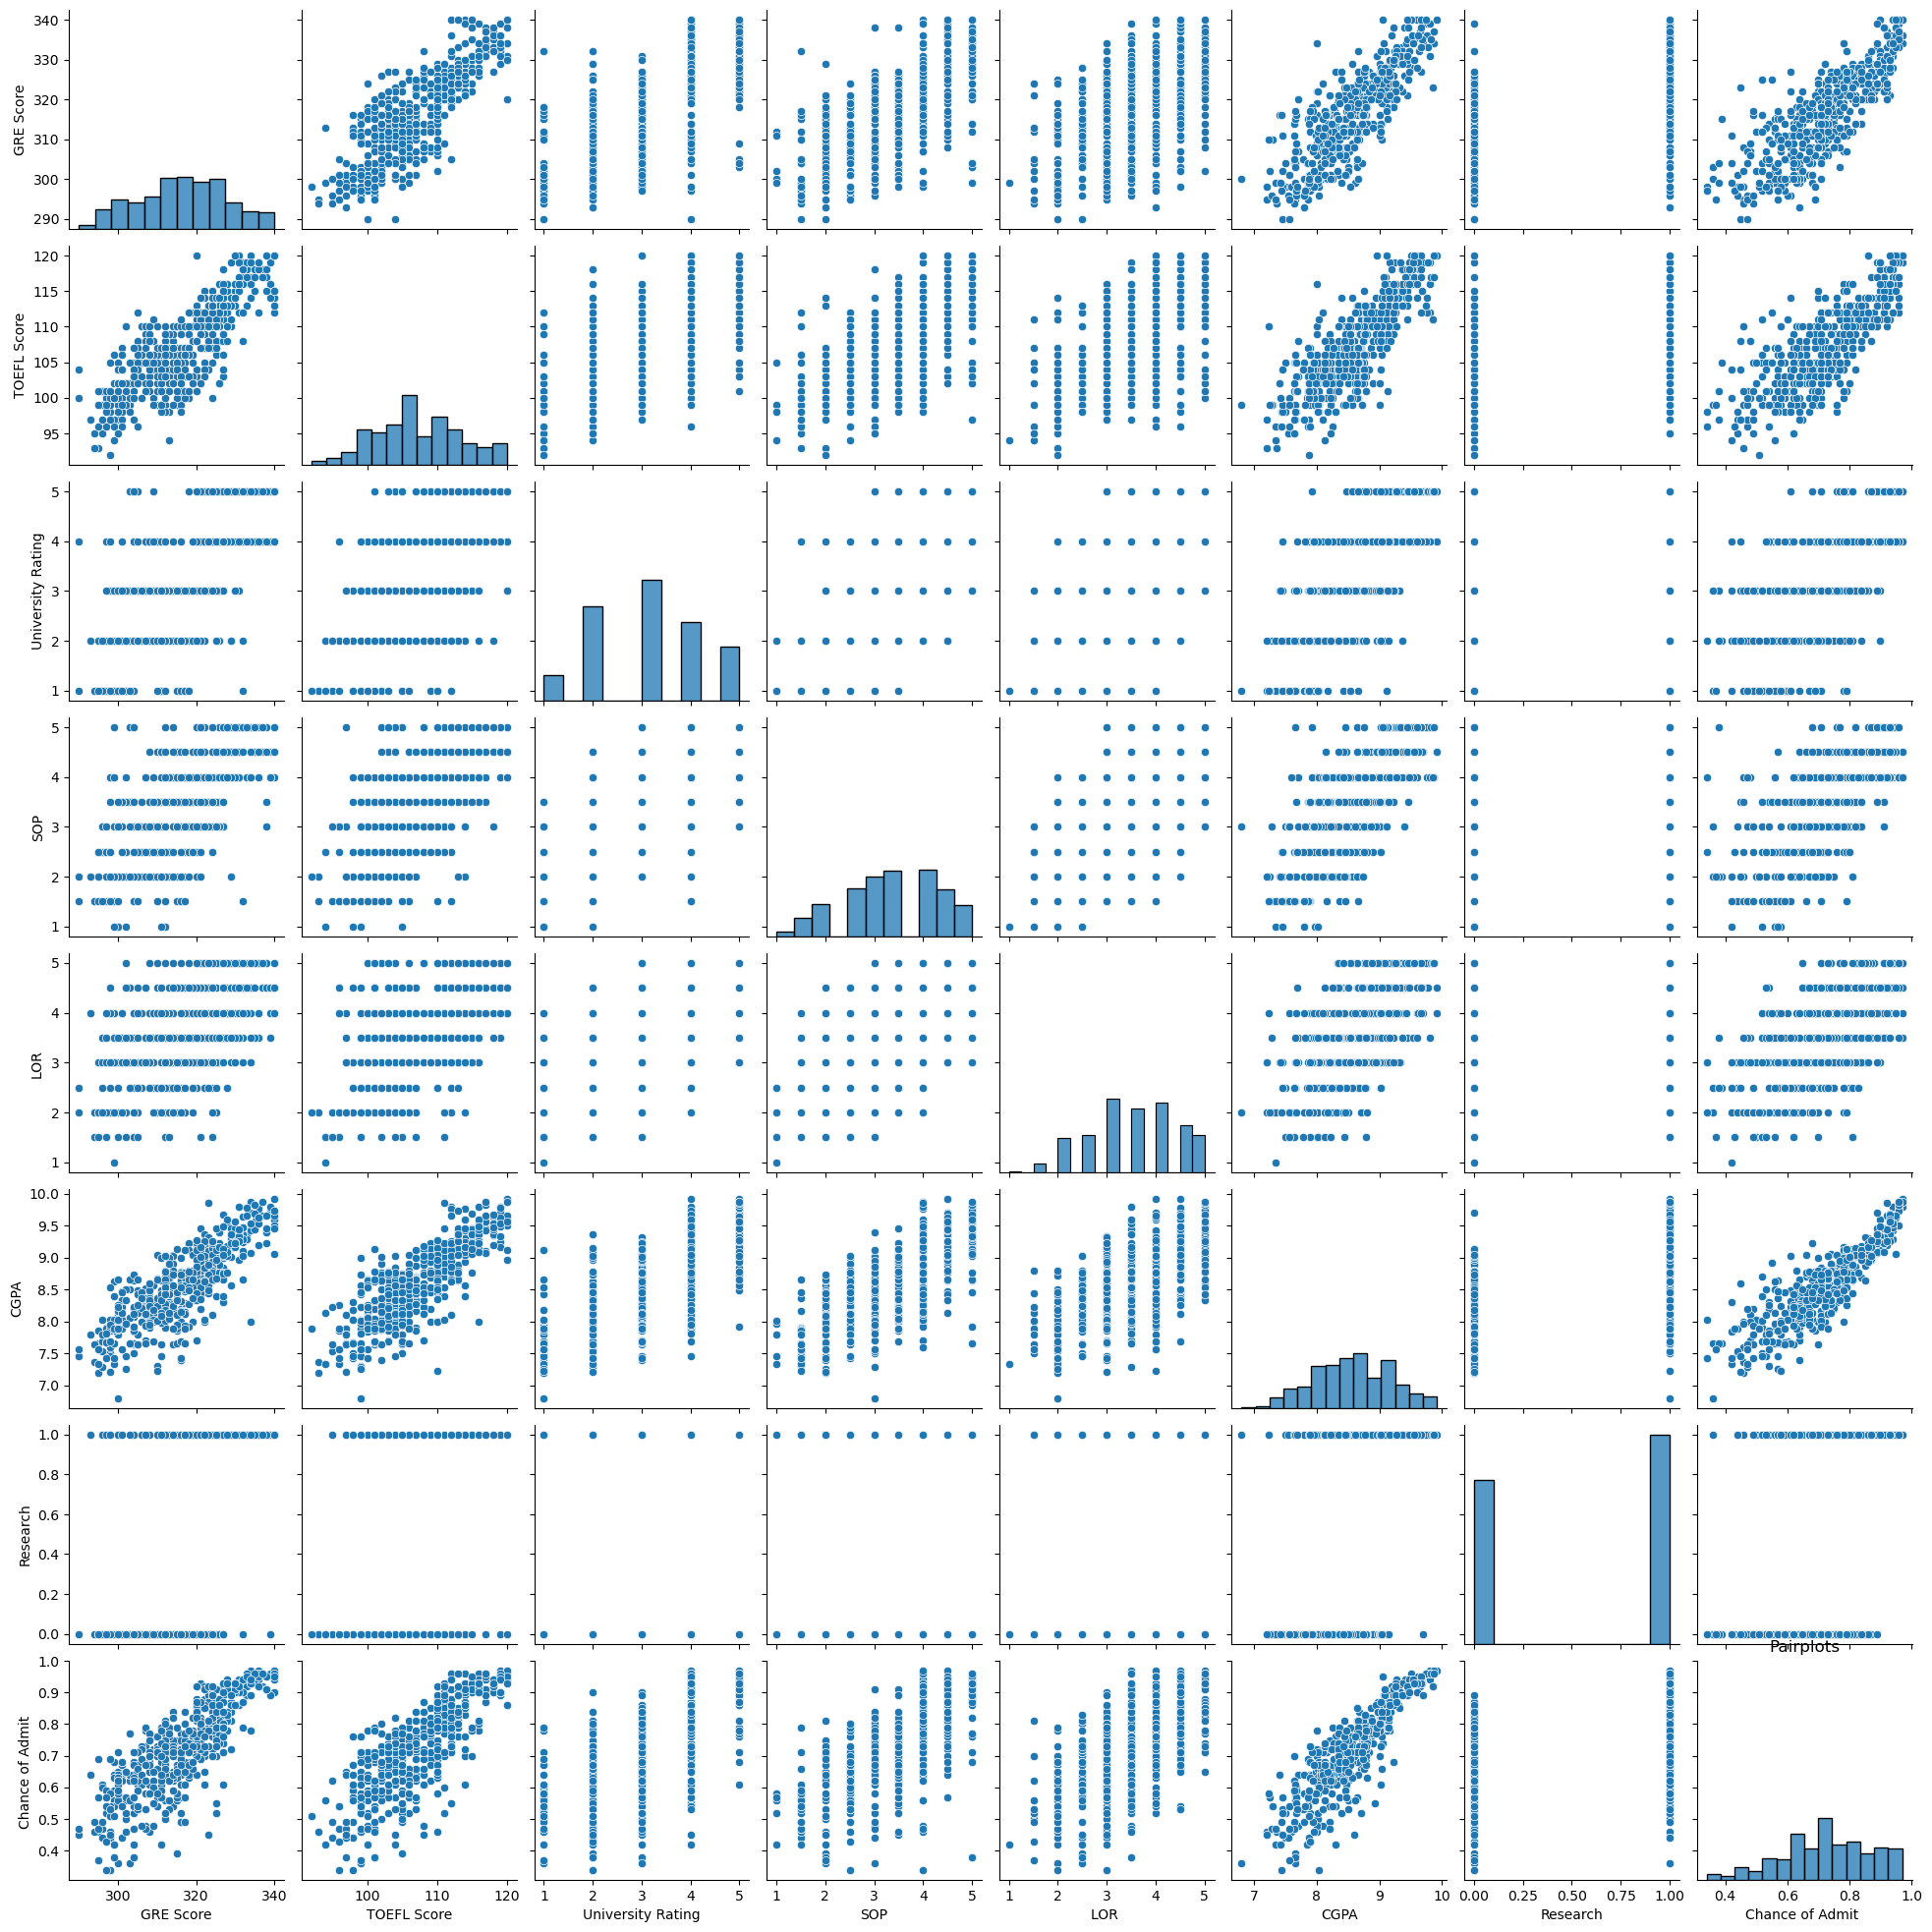

In [148]:
sns.pairplot(df)
plt.title('Pairplots')
plt.show()

##### We can see that GRE_Score TOEFL_Score and CGPA have good positive correlation with Chance of Admit

In [149]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Checking Null Values

In [150]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

##### No Null values present to handle

In [151]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

##### As we can see some column names have extra spaces.Lets remove them

In [152]:
df.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'}, inplace=True)

In [153]:
for column in df.columns:
    print(f"no of unique elements in column: ",column,"->",df[column].nunique())


no of unique elements in column:  GRE Score -> 49
no of unique elements in column:  TOEFL Score -> 29
no of unique elements in column:  University Rating -> 5
no of unique elements in column:  SOP -> 9
no of unique elements in column:  LOR -> 9
no of unique elements in column:  CGPA -> 184
no of unique elements in column:  Research -> 2
no of unique elements in column:  Chance of Admit -> 61


##### From the pairplots and no of unique elements we can understand that "University Rating" "SOP" "LOR" and "Research" are categorical columns


In [154]:
df['University Rating'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [155]:
df['Research'].unique()

array([1, 0], dtype=int64)

##### Also "Research" column has only 2 values.Hence converting it to Bool and rest to Category

In [156]:
df[['University Rating', 'SOP', 'LOR']] = df[['University Rating', 'SOP', 'LOR']].astype('category')
df['Research'] = df['Research'].astype('bool')

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    category
 4   LOR                500 non-null    category
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    bool    
 7   Chance of Admit    500 non-null    float64 
dtypes: bool(1), category(3), float64(2), int64(2)
memory usage: 18.6 KB


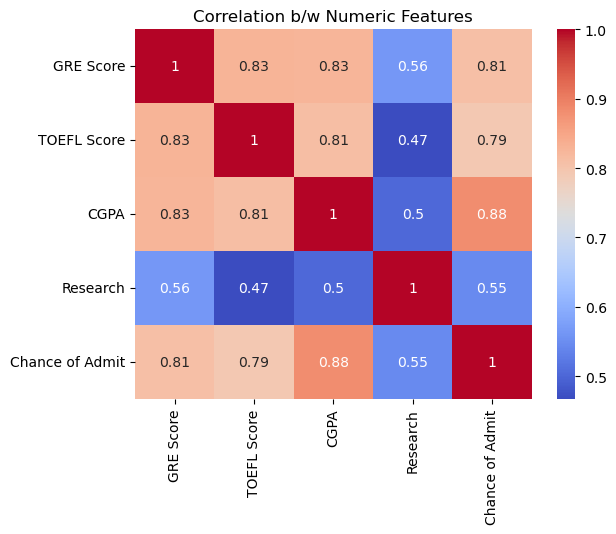

In [158]:
#Heatmap for coreelation
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True,cmap="coolwarm")
plt.title('Correlation b/w Numeric Features')
plt.show()

##### Confirming the inferences from pairplot, the correlation matrix also shows that exam scores (CGPA/GRE/TOEFL) have a strong positive correlation with chance of admit and amongst themselves

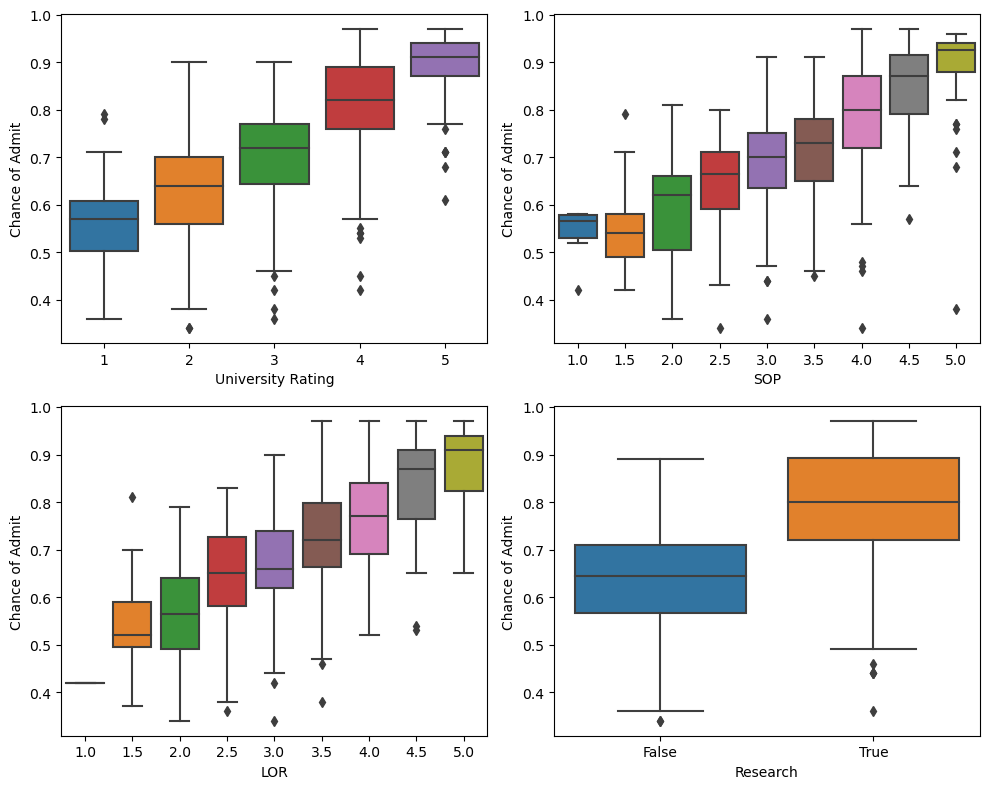

In [159]:
# Boxplots for categorical columns

cat_cols = df.select_dtypes(include=['bool','category']).columns.tolist()
plt.figure(figsize=(10,8))
i=1
for col in cat_cols:
  ax = plt.subplot(2,2,i)
  sns.boxplot(data = df, x=col, y='Chance of Admit')
  plt.xlabel(col)
  plt.ylabel('Chance of Admit')
  i+=1

plt.tight_layout()
plt.show()

##### Even categorical columns seem to affect Chance of Admit,more the values more the chance for each of the above columns

# Univariate analysis

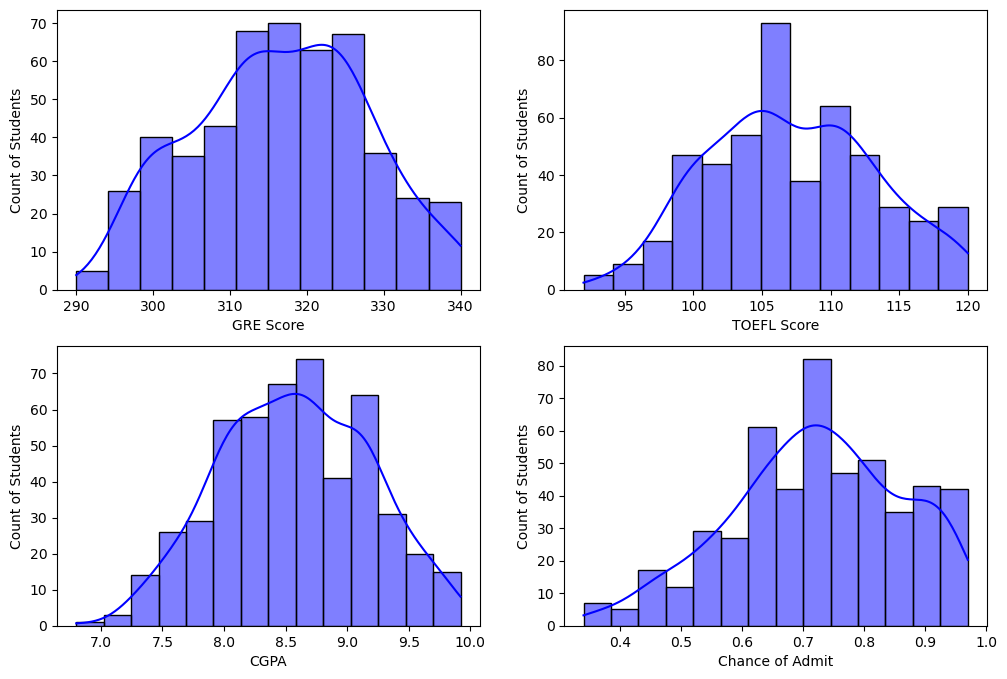

In [160]:
# Distribution of continuous numerical features
numeric_cols = df.select_dtypes(include=['float','int']).columns.tolist()

plt.figure(figsize=(12,8))
i=1
for col in numeric_cols:
  ax=plt.subplot(2,2,i)
  sns.histplot(data=df[col], kde=True,color="Blue")
  plt.xlabel(col)
  plt.ylabel('Count of Students')
  i += 1

plt.show()

We can see the range of all the numerical attributes:

GRE scores are between 290 and 340, with maximum students scoring in the range 310-330

TOEFL scores are between 90 and 120, with maximum students scoring around 105

CGPA ranges between 7 and 10, with maximum students scoring around 8.5

Chance of Admit is a probability percentage between 0 and 1, with maximum students scoring around 70%-75%

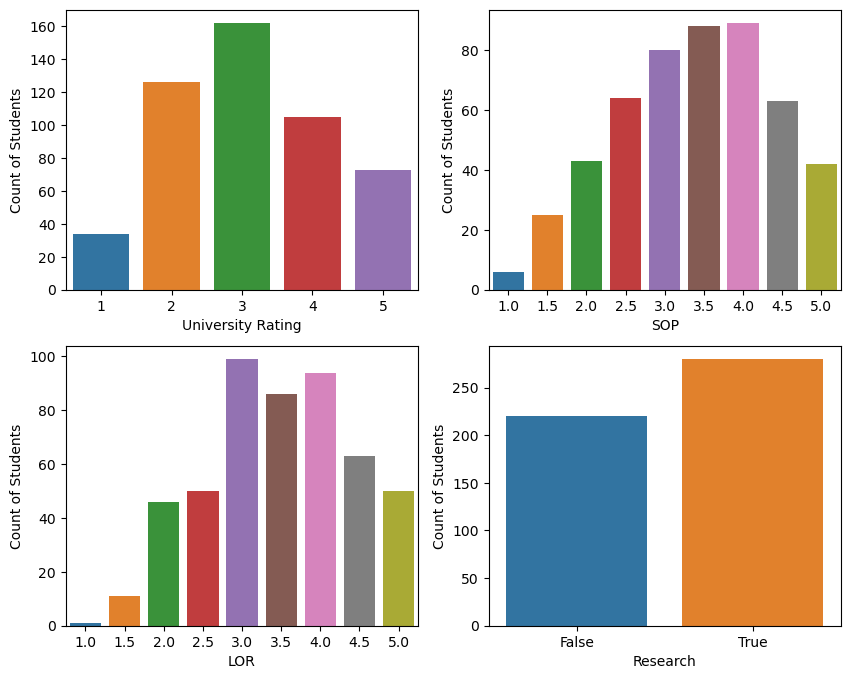

In [161]:
# Distribution of categorical variables
plt.figure(figsize=(10,8))
i=1

for col in cat_cols:
  ax = plt.subplot(2,2,i)
  sns.countplot(x=df[col])
  plt.xlabel(col)
  plt.ylabel('Count of Students')
  i+=1
plt.show()

It can be observed that the most frequent value of categorical features is as following:
* University Rating: 3
* SOP: 3.5 & 4
* LOR: 3
* Research: True

# Data Preprocessing

### Outlier detection

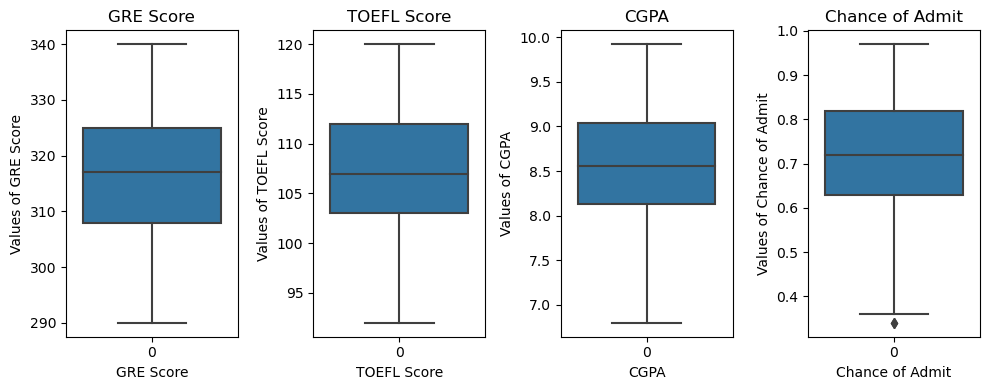

In [162]:
plt.figure(figsize=(10,4))
i=1

for col in numeric_cols:
  ax = plt.subplot(1,4,i)
  sns.boxplot(df[col])
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel(f'Values of {col}')
  i+=1

plt.tight_layout()
plt.show()

#### There seems to be no outlier

In [163]:
# Check for Duplicate rows
df.duplicated().sum()

0

##### There are no duplicate rows in the dataset

## Encoding categorical and Boolean column

In [164]:
# Encode categorical variables
label_encoder = LabelEncoder()

df['University Rating'] = label_encoder.fit_transform(df['University Rating'])
df['SOP'] = label_encoder.fit_transform(df['SOP'])
df['LOR'] = label_encoder.fit_transform(df['LOR'])

# One-hot encode the 'Research' column
df = pd.get_dummies(df, columns=['Research'], drop_first=True)

## Standardization

In [165]:
# Standardize numerical columns
scaler = StandardScaler()
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA']

df[num_cols] = scaler.fit_transform(df[num_cols])

# Train Test split

In [166]:
# Split the data into features and target
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant term to the features for statsmodels
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Performing Linear Regression (Stats model)

In [167]:
# Fit the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Wed, 06 Dec 2023   Prob (F-statistic):          3.41e-142
Time:                        02:29:02   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6568      0.01

## Displaying Coefficients

In [168]:
# Display model coefficients with column names
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.params})
print(coefficients)


                             Feature  Coefficient
const                          const     0.656820
GRE Score                  GRE Score     0.027470
TOEFL Score              TOEFL Score     0.018202
University Rating  University Rating     0.002569
SOP                              SOP     0.000907
LOR                              LOR     0.008619
CGPA                            CGPA     0.067990
Research_True          Research_True     0.024027


## Plotting Coefficients of the model

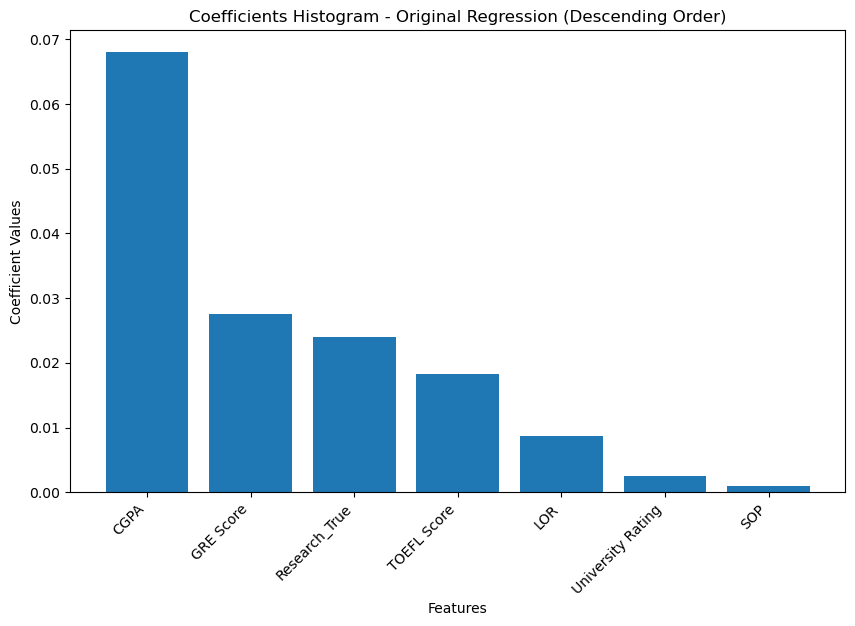

In [169]:
# Sort coefficients by absolute value in descending order
sorted_coefficients = coefficients[coefficients['Feature'] != 'const'].sort_values(by='Coefficient', key=lambda x: np.abs(x), ascending=False)

# Plot coefficients histogram for original regression in descending order
plt.figure(figsize=(10, 6))
plt.bar(sorted_coefficients['Feature'], sorted_coefficients['Coefficient'])
plt.title('Coefficients Histogram - Original Regression (Descending Order)')
plt.xlabel('Features')
plt.ylabel('Coefficient Values')
plt.xticks(rotation=45, ha='right')
plt.show()



## Testing Ridge Regression

In [170]:
# Ridge Regression
alpha_ridge = 1.0  # You can experiment with different alpha values

ridge_model = Ridge(alpha=alpha_ridge)
ridge_model.fit(X_train, y_train)

# Predict on the test set
ridge_predictions = ridge_model.predict(X_test)

# Evaluate Ridge Regression
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print(f'Ridge Mean Squared Error: {ridge_mse}')

# Display Ridge coefficients
ridge_coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': ridge_model.coef_})
print(ridge_coefficients)


Ridge Mean Squared Error: 0.0037059205649980246
             Feature  Coefficient
0              const     0.000000
1          GRE Score     0.027657
2        TOEFL Score     0.018331
3  University Rating     0.002668
4                SOP     0.000978
5                LOR     0.008663
6               CGPA     0.067394
7      Research_True     0.023776


## Testing Lasso Regression

In [171]:
# Lasso Regression
alpha_lasso = 1.0  # You can experiment with different alpha values

lasso_model = Lasso(alpha=alpha_lasso)
lasso_model.fit(X_train, y_train)

# Predict on the test set
lasso_predictions = lasso_model.predict(X_test)

# Evaluate Lasso Regression
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print(f'Lasso Mean Squared Error: {lasso_mse}')

# Display Lasso coefficients
lasso_coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lasso_model.coef_})
print(lasso_coefficients)


Lasso Mean Squared Error: 0.020598230624999995
             Feature  Coefficient
0              const          0.0
1          GRE Score          0.0
2        TOEFL Score          0.0
3  University Rating          0.0
4                SOP          0.0
5                LOR          0.0
6               CGPA          0.0
7      Research_True          0.0


## Model Evauation and choosing best model

In [172]:
# Function to evaluate model performance
def evaluate_model_performance(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    # Calculate Adjusted R-squared
    n = len(y_true)
    p = X_train.shape[1]  # Number of features
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    
    print(f"{model_name} Performance:")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R-squared: {r2:.4f}")
    print(f"Adjusted R-squared: {adj_r2:.4f}")
    print("\n")

# Evaluate performance for original linear regression
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Original Linear Regression Performance:")
evaluate_model_performance("Train", y_train, y_train_pred)
evaluate_model_performance("Test", y_test, y_test_pred)

# Evaluate performance for Ridge regression
ridge_train_pred = ridge_model.predict(X_train)
ridge_test_pred = ridge_model.predict(X_test)

print("Ridge Regression Performance:")
evaluate_model_performance("Train", y_train, ridge_train_pred)
evaluate_model_performance("Test", y_test, ridge_test_pred)

# Evaluate performance for Lasso regression
lasso_train_pred = lasso_model.predict(X_train)
lasso_test_pred = lasso_model.predict(X_test)

print("Lasso Regression Performance:")
evaluate_model_performance("Train", y_train, lasso_train_pred)
evaluate_model_performance("Test", y_test, lasso_test_pred)


Original Linear Regression Performance:
Train Performance:
MAE: 0.0425
RMSE: 0.0594
R-squared: 0.8211
Adjusted R-squared: 0.8174


Test Performance:
MAE: 0.0427
RMSE: 0.0609
R-squared: 0.8188
Adjusted R-squared: 0.8029


Ridge Regression Performance:
Train Performance:
MAE: 0.0425
RMSE: 0.0594
R-squared: 0.8211
Adjusted R-squared: 0.8174


Test Performance:
MAE: 0.0427
RMSE: 0.0609
R-squared: 0.8188
Adjusted R-squared: 0.8029


Lasso Regression Performance:
Train Performance:
MAE: 0.1133
RMSE: 0.1404
R-squared: 0.0000
Adjusted R-squared: -0.0205


Test Performance:
MAE: 0.1163
RMSE: 0.1435
R-squared: -0.0072
Adjusted R-squared: -0.0958




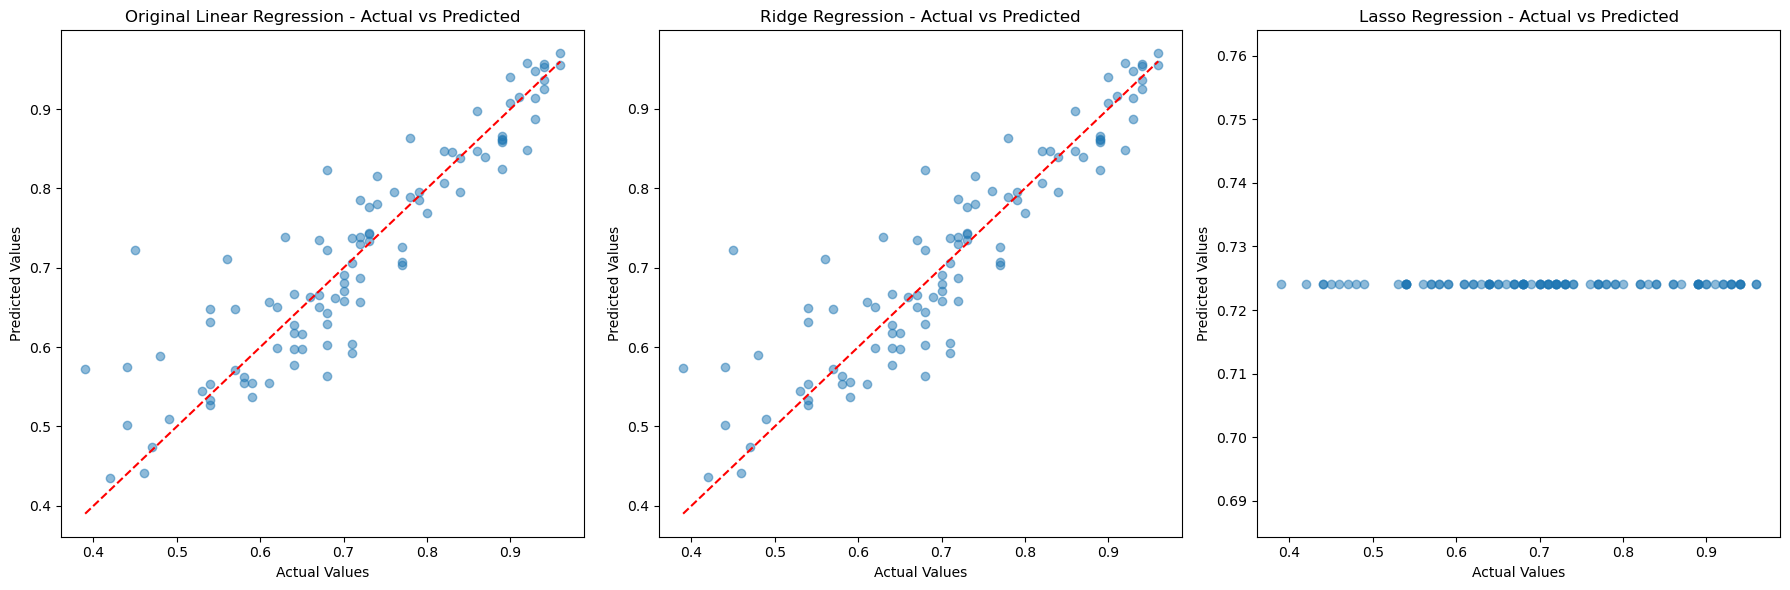

In [174]:
# Function to create actual vs predicted subplot
def plot_actual_vs_predicted(ax, model_name, y_true, y_pred, include_regression_line=True):
    ax.scatter(y_true, y_pred, alpha=0.5)
    
    if include_regression_line:
        ax.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
    
    ax.set_title(f"{model_name} - Actual vs Predicted")
    ax.set_xlabel("Actual Values")
    ax.set_ylabel("Predicted Values")

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Original Linear Regression
plot_actual_vs_predicted(axs[0], "Original Linear Regression", y_test, y_test_pred)

# Ridge Regression
plot_actual_vs_predicted(axs[1], "Ridge Regression", y_test, ridge_test_pred)

# Lasso Regression without regression line
plot_actual_vs_predicted(axs[2], "Lasso Regression", y_test, lasso_test_pred, include_regression_line=False)

plt.tight_layout()
plt.show()


##### Based on the metrics and the plots it can be concluded that Linear regression and Ridge regression works well

# Testing the assumptions of the linear regression model

## Multicollinearity

In [176]:
# Function to calculate VIF for each feature
def calculate_vif(data_frame):
    features = data_frame.columns
    vif_data = pd.DataFrame()
    vif_data["Variable"] = features
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

# Function to drop variables with the highest VIF one-by-one until all VIF < threshold
def drop_high_vif_variables(X, threshold=5):
    vif_data_list = []
    vif_exceeds_threshold = True
    
    while vif_exceeds_threshold:
        vif_data = calculate_vif(X)
        vif_data_list.append(vif_data.copy())  # Store VIF data for each iteration
        
        max_vif_variable = vif_data.loc[vif_data['VIF'].idxmax(), 'Variable']
        max_vif_value = vif_data.loc[vif_data['VIF'].idxmax(), 'VIF']
        
        if max_vif_value > threshold:
            print(f"Dropping variable '{max_vif_variable}' with VIF: {max_vif_value}")
            X = X.drop(max_vif_variable, axis=1)
        else:
            vif_exceeds_threshold = False
    
    return vif_data_list

# Check multicollinearity for original regression using VIF
X_vif = X_train.drop('const', axis=1)  # Drop the constant term for VIF calculation
vif_data_iterations = drop_high_vif_variables(X_vif)

# Print VIF data for each iteration
for i, vif_data in enumerate(vif_data_iterations):
    print(f"\nIteration {i + 1} - VIF Data:")
    print(vif_data)



Dropping variable 'SOP' with VIF: 15.743370289367467
Dropping variable 'University Rating' with VIF: 8.504260327988412

Iteration 1 - VIF Data:
            Variable        VIF
0          GRE Score   4.478631
1        TOEFL Score   3.604180
2  University Rating  10.900082
3                SOP  15.743370
4                LOR  12.747317
5               CGPA   3.720576
6      Research_True   3.232318

Iteration 2 - VIF Data:
            Variable       VIF
0          GRE Score  4.463182
1        TOEFL Score  3.588119
2  University Rating  8.504260
3                LOR  8.011269
4               CGPA  3.719990
5      Research_True  3.184154

Iteration 3 - VIF Data:
        Variable       VIF
0      GRE Score  4.459292
1    TOEFL Score  3.536775
2            LOR  2.682130
3           CGPA  3.707383
4  Research_True  3.033216


##### Multicollinear variables removed

## Mean of Residuals

In [177]:
# Calculate residuals for the original linear regression model
residuals = y_train - model.predict(X_train)

# Calculate the mean of residuals
mean_residuals = residuals.mean()

# Print the mean of residuals
print(f"Mean of Residuals: {mean_residuals:.4f}")


Mean of Residuals: -0.0000


##### Since the mean of residuals is very close to 0, we can say that the model is unbiased

## Linearity of variables

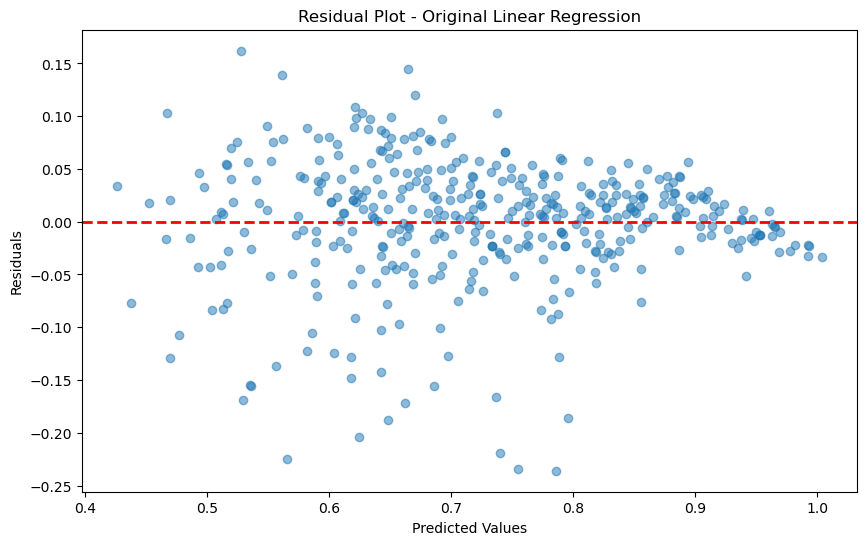

In [178]:
# Generate residual plot for the original linear regression model
plt.figure(figsize=(10, 6))
plt.scatter(model.predict(X_train), residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot - Original Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


##### Since the residual plot shows no clear pattern or trend in residuals, we can conclude that linearity of variables exists

## Homoscedasticity

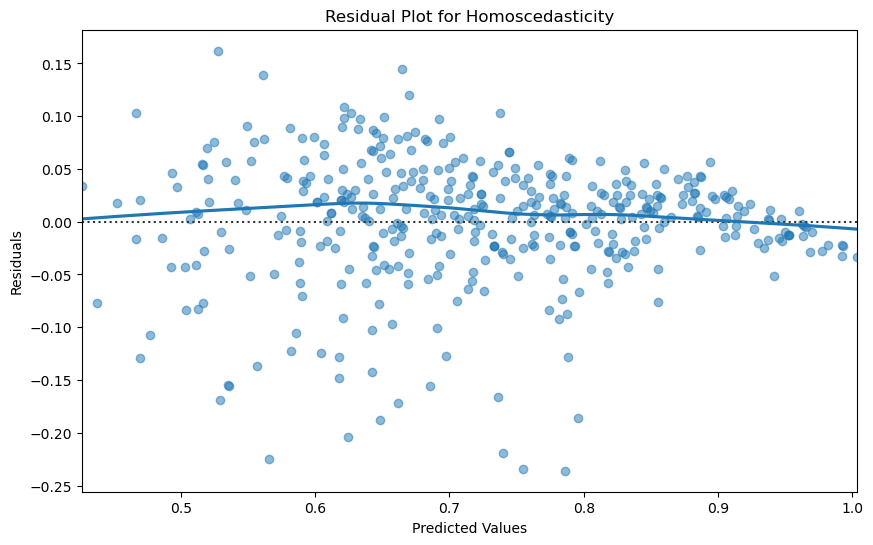

In [188]:
# Generate residual plot for homoscedasticity
plt.figure(figsize=(10, 6))
sns.residplot(x=model.predict(X_train), y=residuals, lowess=True, scatter_kws={'alpha': 0.5})
plt.title('Residual Plot for Homoscedasticity')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


##### No fanning or cone shape,hence Homoscedasticity met

## Test for Normality

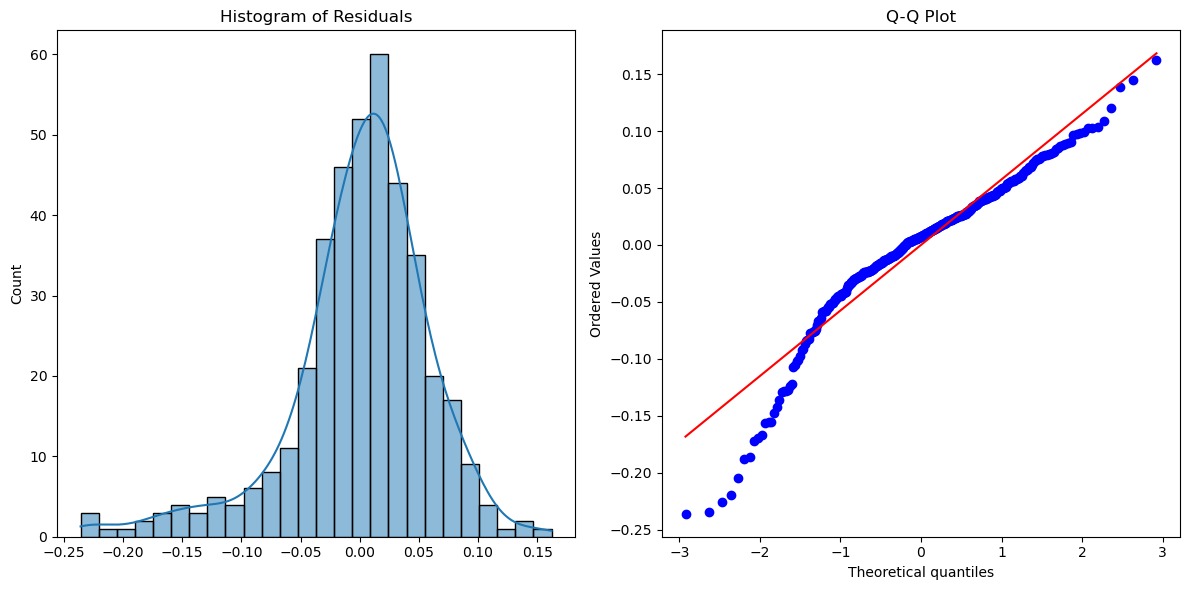

Shapiro-Wilk Test p-value: 7.73526370994454e-13


In [190]:
from scipy.stats import shapiro, probplot

# Visual inspection - Histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')

# Q-Q plot
plt.subplot(1, 2, 2)
probplot(residuals, plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

# Shapiro-Wilk test for normality
_, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test p-value: {p_value}")


##### Not entirely normal but ok


# Insights & Recommendations

Insights:
* The data is not entirely normally distributed but we can still proceed as it is very close
* CGPA is the strongest predictor of chance of admit followed by GRE and Research
* CGPA, GRE Score, TOEFL Score all these numerical columns have positive correlation with Chance of Admit and among themselves
* Even categorical columns show that as they increase in value the chance of admit increases
* Linear Regression and Ridge Regression models both have similar R2 values of 0.82 and are good models for case in hand
* The predictor variables are too multicollinear and data is close to normal but not entirely.Linearity and homoscedasticity is   met.

Recommendations:
* Clearly even some of the predictor varibale like CGPA, GRE Score etc alone would give similar predictions because of Multicollinearity so we can remove unimportant variables
* On the other hand, We can introduce other independent variables like work experience, psychrometric test results, Group discussion results,Board results,other Research as predictor variables for better predictions